# <center>Digital Image Processing - Problem Set 5</center>

### Student Names: Daniela Charris Stand & Germán Monsalve Luna

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Problem 1. 

Write a function that describes <i>each</i> object in a binary image using the Hu statistical moments. The Hu moments are invariant to rotation, scale and translation. These moments can be defined for <i>each</i> region in a binary image. The OpenCV function to compute these moments is <tt>cv2.HuMoments</tt>.

Original Image
[  2.70487966e-03   4.01977932e-08   3.64749400e-11   5.23356029e-11
  -2.07567943e-21   2.79314048e-15  -9.59252475e-22]
Rotating:
[  2.70487966e-03   4.01977932e-08   3.64749400e-11   5.23356029e-11
  -2.07567943e-21   2.79314048e-15  -9.59252475e-22]


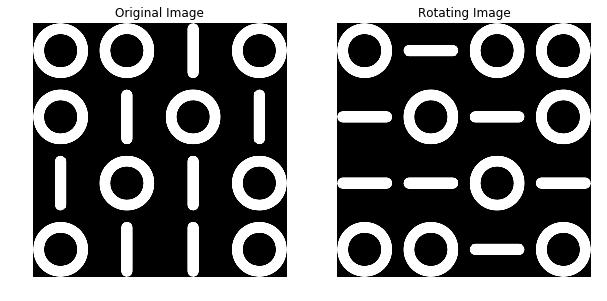

In [60]:
#Function developed
def H_moments(img):
    moments_dic = cv2.moments(img) #Compute the original 24 moments associated with the image.
    HuMoments=cv2.HuMoments(moments_dic).flatten() #Calculate Hu's seven invariant moments with the 24 moments.
    return HuMoments

#Load image
image = cv2.imread('binary.png',0)#Load Image
#Call function
HuM_orig=H_moments(image0)
#Print Hu Moments
print('Original Image')
print(HuM_orig)

#Load image
image_r = cv2.imread('binary_r.png',0)#Load Image
#Call function
HuM_rot=H_moments(image1)#Call function
#Print Hu Moments
print('Rotating:')
print(HuM_rot) 

plt.figure(figsize=(10,10));
plt.subplot(1,2,1); plt.imshow(image, cmap = 'gray');plt.title('Original Image');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(image_r, cmap = 'gray');plt.title('Rotating Image');plt.axis('off') #Display the image
plt.show()


Original Image
[  2.70487966e-03   4.01977932e-08   3.64749400e-11   5.23356029e-11
  -2.07567943e-21   2.79314048e-15  -9.59252475e-22]
Rotating:
[  2.70487966e-03   4.01977932e-08   3.64749400e-11   5.23356029e-11
  -2.07567943e-21   2.79314048e-15  -9.59252475e-22]


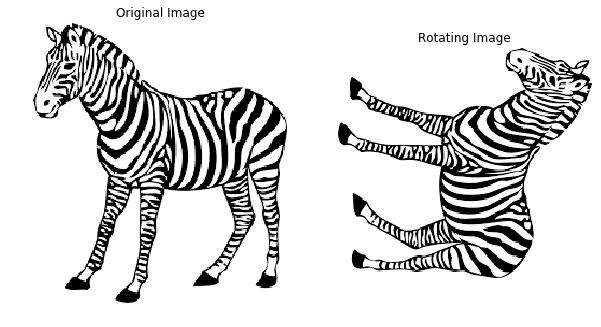

In [61]:
#Load image
image = cv2.imread('zebra.png',0)#Load Image
#Call function
HuM_orig=H_moments(image0)
#Print Hu Moments
print('Original Image')
print(HuM_orig)

#Load image
image_r = cv2.imread('zebra_r.png',0)#Load Image
#Call function
HuM_rot=H_moments(image1)#Call function
#Print Hu Moments
print('Rotating:')
print(HuM_rot) 

plt.figure(figsize=(10,10));
plt.subplot(1,2,1); plt.imshow(image, cmap = 'gray');plt.title('Original Image');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(image_r, cmap = 'gray');plt.title('Rotating Image');plt.axis('off') #Display the image
plt.show()

### Implementación
Se utiliza la función <tt>moments() </tt> para encontrar los 24 momentos asociados a la imagen. Posteriormente, con los 24 momentos se calculan los 7 momentos Hu invariantes, por medio de la función <tt>HuMoments() </tt>, los cuales se retornan de la función desarrollada y se muestran en pantalla. 

### Resultados
Se observa como a pesar de la rotación en las imágenes, los 7 momentos Hu no cambian. Esto se debe a que los momentos Hu son invariantes ante rotación, escala y traslación.

### Problem 2

Write a function that detects corners on an image using the Harris corner detection method. You can use the OpenCV built-in functions. Your function should output the $N$ detected corner locations in a $2 \times N$ matrix. Visualize your results by plotting the corners on top of the input image.  Apply your function to the binary image <tt> shapes.png</tt> and to the grayscale image <tt>face.tif</tt>.

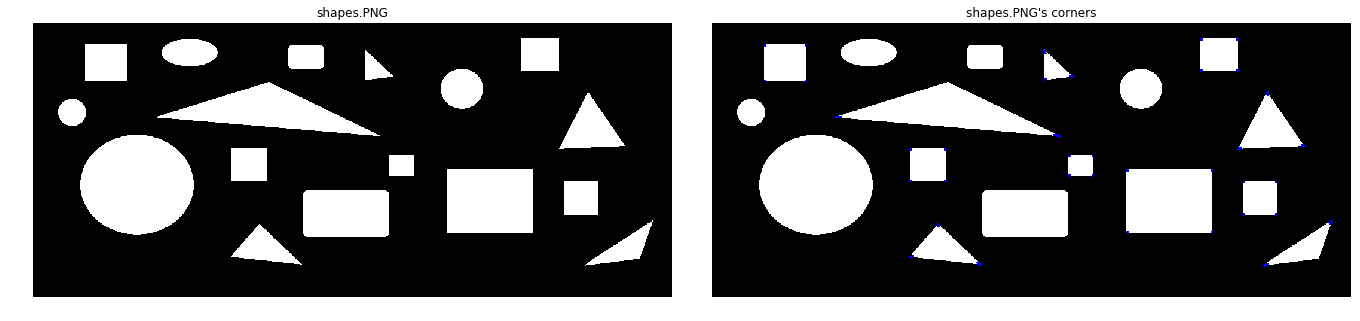

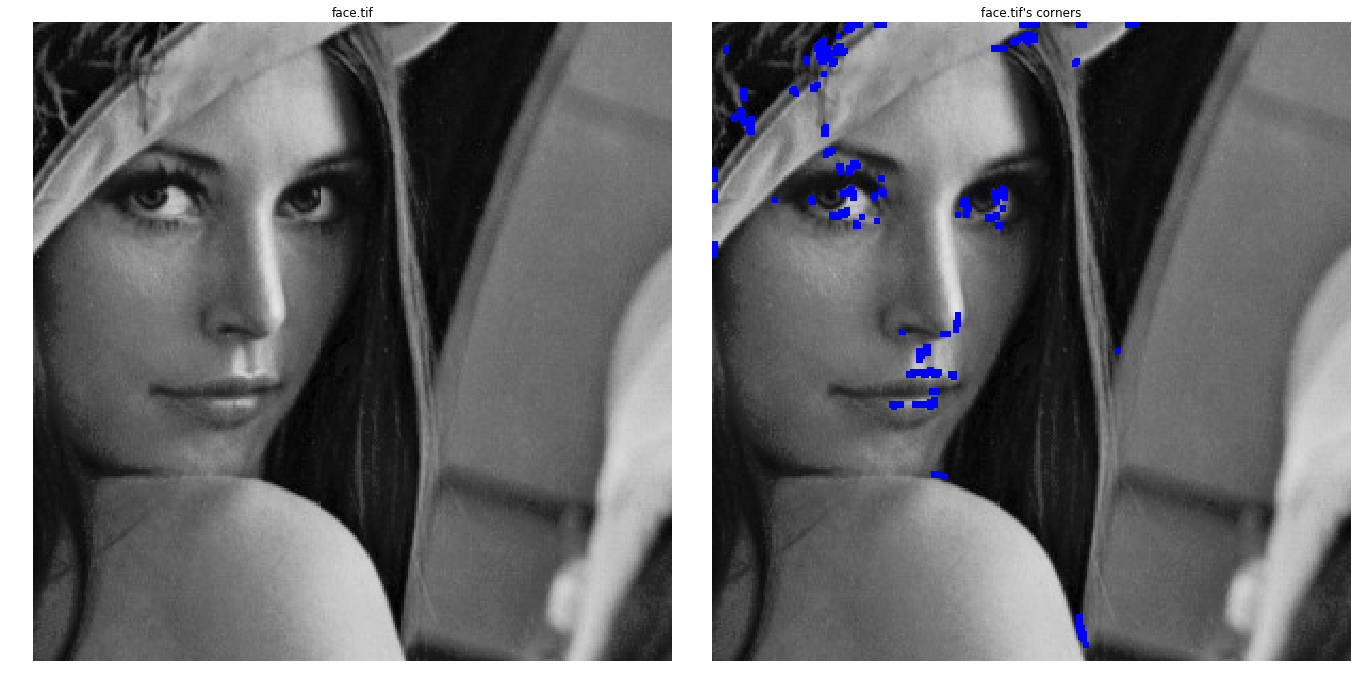

In [49]:
def corner_detection(img):
    #preparing image to cornerHarris Gray and float32
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,9,0.04)

    #Find the corner postions and creating a 2xN matrix 
    corner_locus=np.transpose(np.transpose(np.nonzero(dst>0.01*dst.max())))
    #dilatation in order to make corners 'bigger'
    dst = cv2.dilate(dst,None)
    #making blue corner pixels 
    img[dst>0.01*dst.max()]=[0,0,255]
    return img, corner_locus

filename = 'shapes.PNG'
img = cv2.imread(filename)
corners,corner_locus=corner_detection(img.copy())
plt.figure(figsize=(19,19))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(filename)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(corners,cmap='gray')
plt.title("%s's corners" % (filename))
plt.axis('off')
plt.tight_layout()
plt.show()

filename = 'face.tif'
img = cv2.imread(filename)
corners,corner_locus=corner_detection(img.copy())
plt.figure(figsize=(19,19))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(filename)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(corners,cmap='gray')
plt.title("%s's corners" % (filename))
plt.axis('off')
plt.tight_layout()
plt.show()



### Implementación
Se usa la función <tt>cornerHarris() </tt> para encontrar las esquinas en la imagen. Luego, teniendo en cuenta la matriz de salida, se encuentra la posición de las esquinas con en la línea <tt>corner_locus=np.transpose(np.transpose(np.nonzero(dst>0.01*dst.max()))) </tt>, que qeu encuentra los indices del array que cumplen esa condición. Luego se dilata la matrix de salida, para poder hacer las esquinas visibles y más grandes. Por último se cambian los pixeles que cumplan la condición por azul, de esta forma se logra marcar las esquinas. 

### Resultados

Se observa como se marcan las esquinas en ambas imágnes. También es importante ver que el tamaño de la vecindad afecta la forma como se detectan las esquinas, en este caso se selecciono una vecindad de 2 pixeles y un tamaño de kernel de 9X9 para la operación sobel que se realiza internamente en esta función. La función <tt> cornerHarris()</tt> facilita en gran medida la solución de este problema. Además, se observa que eta función es útil para imagenes binarias y simples, en el caso de <tt> face.tif </tt> se observan varias falsas esquinas detectadas. 

### Problem 3

A company that bottles a variety of industrial chemicals has heard
of your success solving imaging problems and hires you to design an approach
for detecting when bottles are not full. The bottles appear as shown below
as they move along a conveyor line past an automatic
filling and capping station. A bottle is considered imperfectly filled when the
level of the liquid is below the midway point between the bottom of the neck and
the shoulder of the bottle.The shoulder is defined as the region of the bottle
where the sides and slanted portion of the bottle intersect. The bottles are
moving, but the company has an imaging system equipped with an illumination
flash front end that effectively stops motion, so you will be given images that
look very close to the sample shown below.

<img src="files/bottles.png" />

Propose a solution for detecting
bottles that are not filled properly. State clearly all assumptions that you
make and that are likely to impact the solution you propose. Implement your
solution and apply it to the images <tt>bottles.tif, new_bottles.jpg</tt> and <tt> three_bottles.jpg</tt>. Visualize the results
of your algorithm by highlighting with false colors
the regions that are detected as correctly
filled bottles and the regions that are detected as not properly filled bottles.

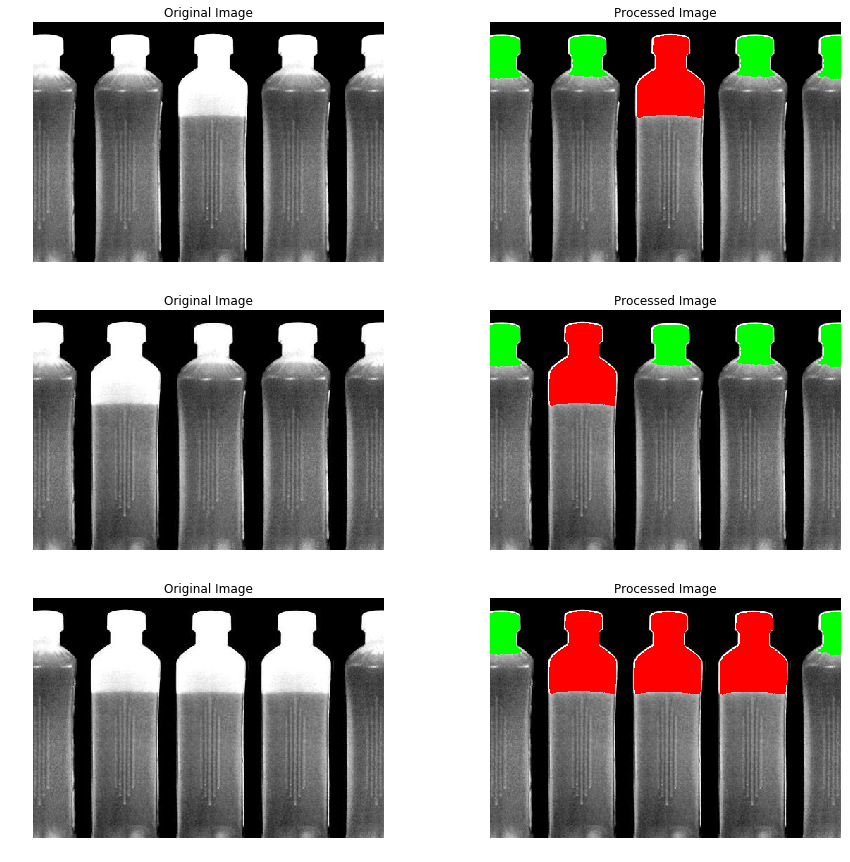

In [68]:
def BottleDet(image):
    #Smoothing image
    b_image = cv2.blur(image, (6, 6)) 
    #Image thresholding
    retVal, t_image = cv2.threshold(b_image,200,230,cv2.THRESH_BINARY)
    #Finding contours. It modifies the image so it's stored in another variable (m_image)
    m_image,contours, hierarchy = cv2.findContours(t_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #Coloring the image to make the false coloring
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    #Evaluate cases for each contour
    for cont in contours:
        #If area of empty space is bigger than 2800
        if(cv2.contourArea(cont) > 2800):
            #RED color
            cv2.drawContours(image, [cont], -1, (255,0,0), thickness=-1)
        else:
            #GREEN color
            cv2.drawContours(image, [cont], -1, (0,255,0), thickness=-1)
    return image

#Load image
img = cv2.imread("bottles.png", cv2.IMREAD_GRAYSCALE)
#Call function
f_img = BottleDet(img)
#Show images
plt.figure(figsize=(15,15)); 
plt.subplot(3,2,1); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('Off')
plt.subplot(3,2,2); plt.imshow(f_img, cmap='gray'); plt.title("Processed Image");plt.axis('Off')

#Load image
img = cv2.imread("new_bottles.jpg", cv2.IMREAD_GRAYSCALE)
#Call function
f_img = BottleDet(img)
plt.subplot(3,2,3); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('Off')
plt.subplot(3,2,4); plt.imshow(f_img, cmap='gray'); plt.title("Processed Image");plt.axis('Off')

#Load image
img = cv2.imread("three_bottles.jpg", cv2.IMREAD_GRAYSCALE)
#Call function
f_img = BottleDet(img)
plt.subplot(3,2,5); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('Off')
plt.subplot(3,2,6); plt.imshow(f_img, cmap='gray'); plt.title("Processed Image");plt.axis('Off')
plt.show()

### Implementación

Inicialmente fue necesario suavizar la imagen de tal forma que solo se detecten los bordes correspondientes a cada botella. Esto se hizo con la función <tt>blur()</tt>, teniendo en cuenta que la imagen está en escala de grises. Dado que los valores de los pixeles correspondientes a las regiones vacías son significativamente mayores a los valores de los píxeles del resto de la imagen, se utiliza la función <tt>threshold() </tt> para convertir la imagen a binaria, así, solo se obtienen las regiones vacías en cada botella. Posteriormente, con la función <tt>findContours()</tt>. Se convierte la imagen a color para poder realizar el falso color de acuerdo al área contenida en cada contorno (5 dado que son 5 botellas). Con un valor experimental de threshold para definir si la botella está vacía o llena se realizó el falso color en cada imagen.

### Resultados
Para este inciso, se asume que la cámara está quieta y cuando se produce el disparo, siempre se muestran 5 botellas en la imagen. Al escoger el tamaño del kernel para el suavizado de la imagen, se tuvo en cuenta que el número de contornos arrojados para tal imagen debía ser igual a los 5 contornos correspondientes a las botellas. Este valor de kernel fue 6x6. Con este valor se obtuvieron los resultados deseados, ya que con valores por debajo, los contornos arrojados eran más que los deseados.

Posteriormente, para el thresholding, también se escogió un valor de 230 experimental, dado que con valores por debajo se obtenían como contornos los bordes de las botellas y a partir de ese valor solo se obtenía el área vacía de cada botella. En lo referente al área de cada contorno, se realizaron pruebas donde se mostraba el área de cada contorno y se asociaba a si estaba bien lleno o no. Por tanto, el valor obtenido para realzar la detección de botellas también se basó en pruebas experimentales. 
Sin embargo, para todos los valores de threshold escogidos se obtuvieron resultados satisfactorios.



### Problem 4

Suppose that you are observing objects in the night sky. Suppose that only ‘big’ objects are important to your observation. In this scenario, ‘small’ objects are considered noise. Write a python function that processes the image as follows:

1. Use a 15x15 averaging filter to blur the image.

2. Apply a threshold of 0.25 to binarize the resulting blurred image.

3. Use the binary image to ‘mask’ the noise of the original image: simply perform an element-wise multiplication of the binary image and the original image.

4. Use connected component analysis on the binary image to count the number of ‘big’ objects found.

The function should take three inputs: an image matrix, the size of the averaging filter and threshold value. Make sure your function displays the intermediary results of each step outlined above.

Apply your function to the input image ‘hubble-original.tif’. Try different values of smoothing kernel size and threshold value. Analyze the relationship between number of objects found and smoothing kernel size and threshold value. In particular, you might want to observe the result when using an averaging filter of size n=1 (i.e. no smoothing).

Displaying intermediate steps


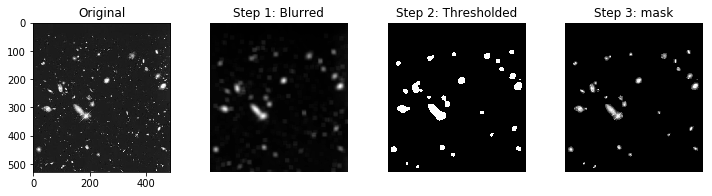

Processed images


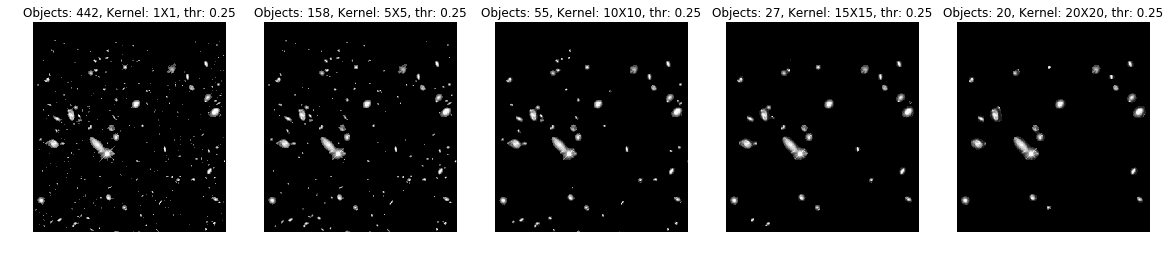

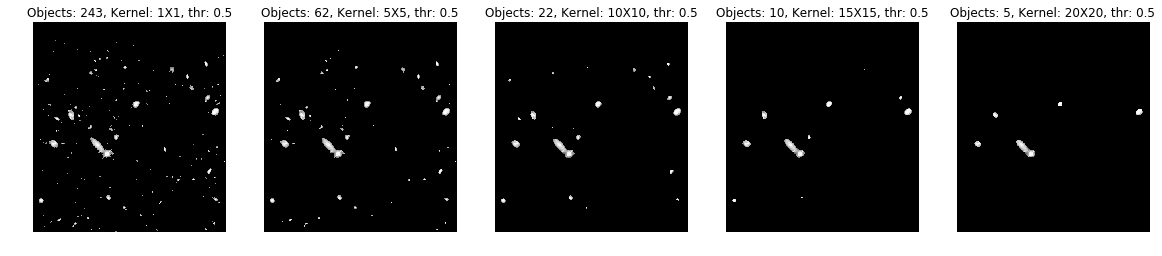

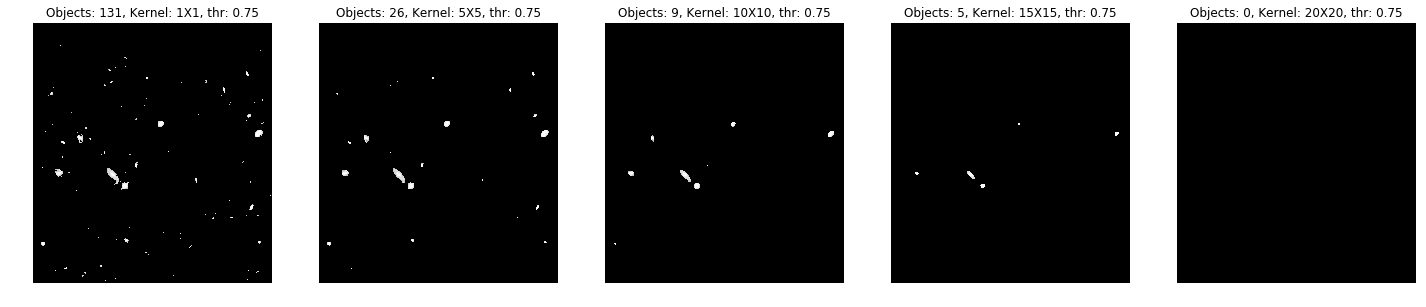

images with Contours


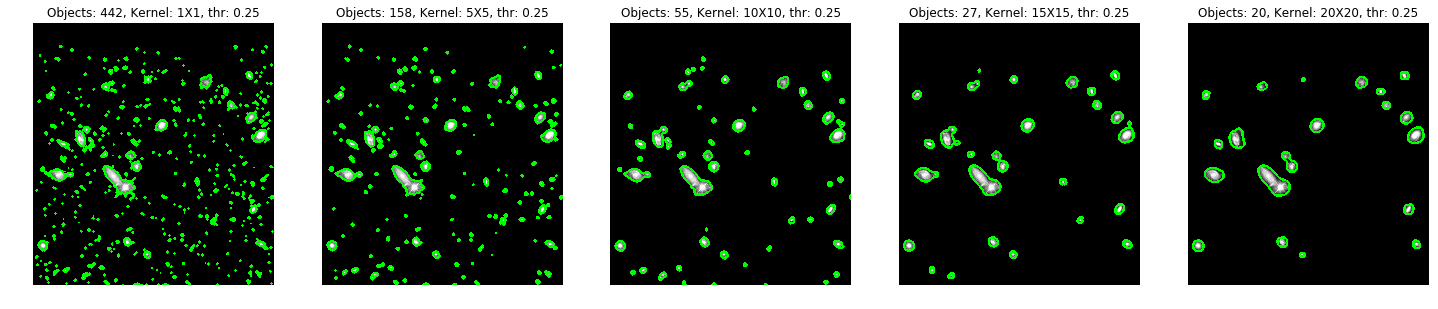

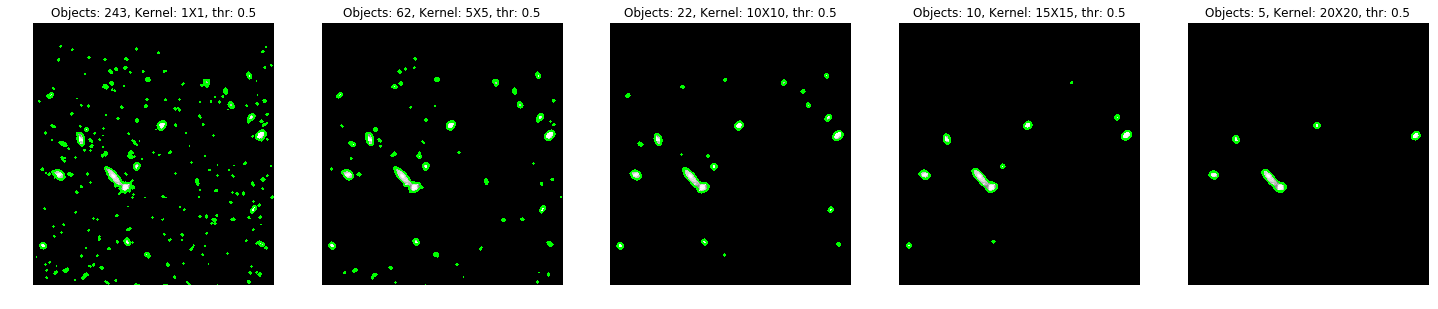

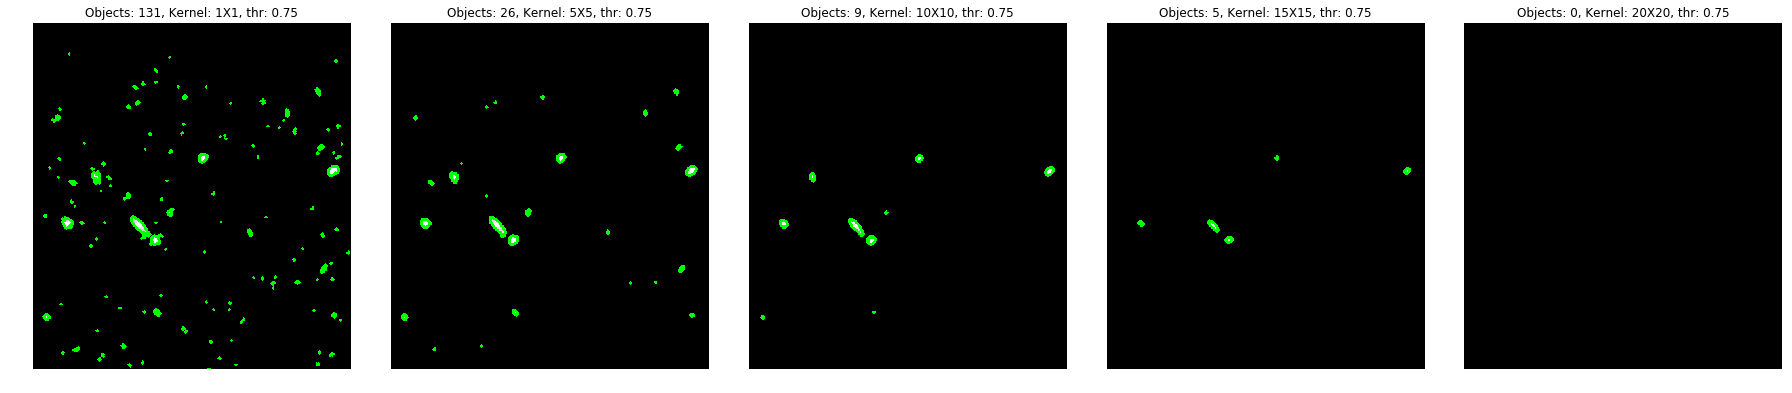

In [176]:
def FindBindObjects(img,k_size, threshold):
    img0 = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    #Average kernel k_sizeXk_size
    kernel = np.ones((k_size,k_size),np.float32)/(k_size*k_size)
    #Averaging blur
    img1=cv2.filter2D(img0.copy(),-1,kernel)  
    #treshold of 0.25
    _,img2=cv2.threshold(img1,threshold*255,1,cv2.THRESH_BINARY)
    #massking the noise of the original image
    img3=np.zeros((img.shape[0], img.shape[1]),  np.uint8)
    img3=img2*img0
    #Connected component analysis
    _,contours,_= cv2.findContours(img3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #number of big objects
    big_obj_count=len(contours)
    #drawing big objects on the binary img
    img3=cv2.cvtColor(img3,cv2.COLOR_GRAY2BGR)
    big_obj_contours=cv2.drawContours(img3.copy(),contours,-1, (0,255,0),3)
    #Returning all intermediary step of the image, if the user want to display 
    return img1,img2,img3,big_obj_contours, big_obj_count

img = cv2.imread('hubble-original.tif')

print('Displaying intermediate steps')
plt.figure(figsize=(10,10))
img1,img2,big_img,big_objects_contours,big_objects_count=FindBindObjects(img.copy(),15,0.25)
plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(img1,cmap='gray')
plt.title('Step 1: Blurred')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img2,cmap='gray')
plt.title('Step 2: Thresholded')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img3,cmap='gray')
plt.title('Step 3: mask')
plt.axis('off')
plt.tight_layout()
plt.show()

print('Processed images')
for threshold in [0.25,0.5,0.75]:
    plt.figure(figsize=(20,20))
    i=1
    for k_size in [1,5,10,15,20]:
        img1,img2,big_img,big_objects_contours,big_objects_count=FindBindObjects(img.copy(),k_size,threshold)
        plt.subplot(1,5,i)
        plt.imshow(big_img)
        plt.title('Objects: %s, Kernel: %sX%s, thr: %s' % (big_objects_count,k_size,k_size,threshold))
        plt.axis('off')
        i=i+1
plt.tight_layout()
plt.show()

#Showing countours in the processed image
print('images with Contours')        
for threshold in [0.25,0.5,0.75]:
    plt.figure(figsize=(25,25))
    i=1
    for k_size in [1,5,10,15,20]:
        img1,img2,big_img,big_objects_contours,big_objects_count=FindBindObjects(img.copy(),k_size,threshold)
        plt.subplot(1,5,i)
        plt.imshow(big_objects_contours)
        plt.title('Objects: %s, Kernel: %sX%s, thr: %s' % (big_objects_count,k_size,k_size,threshold))
        plt.axis('off')
        i=i+1    
        
plt.tight_layout()
plt.show()


### Implementación:
Se siguieron las indicaciones, en el código se muestran los pasos intermedios, las imagenes procesadas con diferentes valores de umbral y tamaño de kernel. También se muestran las imagenes y los contornos dibujados.

### Resultados:

Se observa que dejando fijo el valor de umbral, se obtienen menos objetos a medida que se aumenta el tamaño del kernel de promedio. También se observa que para un valor de tamaño del kernel fijo, se cuentan menos objetos para mayores valores de umbral. Lo anterior se debe a que con el kernel de media los objetos pequeños (considerados ruido) son filtrados, y su efecto es mayor si el tamaño del kernel es mayor. Así mismo al aumentar el nivel de umbral, aumentan la cantidad de pixeles con valor de 255. 

### Problem 5

Write a Python function that computes the bag-of-features representation of an image. In order to accomplish this, your function will need to perform the following steps:

1. Load the input image and apply the SIFT transform to obtain descriptors from its interest points. 
2. Group descriptors: Your function should use the k-means clustering algorithm to group all input features into k=100 groups.
3. Compute a histogram that counts how many times each codebook entry is selected as the closest center.

Apply your function to all car images <tt>image_00XX.jpg</tt>. Store the result in a data file.


In [47]:
def BoF(img,filename):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #Creating SIFT object
    sift = cv2.xfeatures2d.SIFT_create()
    #FEATURE EXTRACTION
    kp, des = sift.detectAndCompute(gray,None)
    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 ) for k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # Set flags (Just to avoid line break in the code)
    flags = cv2.KMEANS_RANDOM_CENTERS
    #LEARNING THE VISUAL VOCABULARY
    # Apply K-means, dividing the descriptors on 100 clusters (100 codebook words)
    compactness,labels,centers = cv2.kmeans(des,100,None,criteria,10,flags)
    #QUANTIZING FEATURES USING VISUAL VOCABULARY/CODEBOOK
    #Getting bag of features, that is Histogram'bins'are' 
    #codewords and'each'bin' counts'the'number'of' words'assigned'to'the'codeword.'
    bag_of_features, bin_edges=np.histogram(labels.copy(), bins=range(100))
    data=pd.Series(bag_of_features)
    #REPRESENTING IMAGES BY FREQUENCIES OF VISUAL WORDS 
    #saving data in a Json file 
    data=data.to_json(path_or_buf=filename,orient='index')
    

for filename in os.listdir('/home/usuario/Documentos/X Semestre/PDI/Problem_Set_5/cars/'):
    #Reading Images
    img = cv2.imread(os.path.join('/home/usuario/Documentos/X Semestre/PDI/Problem_Set_5/cars/',filename))
    #Plotting Images
    if img is not None:
        BoF(img,'/home/usuario/Documentos/X Semestre/PDI/Problem_Set_5/cars_data/%s.json' %(filename[:-4]))
        

### implementación:
Se siguieron los pasos propuestos. Inicialmente se usa la función <tt> cv2.xfeatures2d.SIFT_create() </tt> que permite crear un objeto SIFT. Este objeto es utilizado para encontrar los descriptores de la imagen. Los características son de tamaño n>128 debido a que son descriptores SIFT. Luego cada uno de estos descriptores, que cuentan con 128 puntos de interes, se agrupan utilizando k-means. La función <tt> cv2.kmeans(des,100,None,criteria,10,flags) </tt> permite agrupar los descriptores en 100 grupos. Luego se usan las etiquetas para generar un histograma que será nuestra bolsa de características. Este histograma nos mostrará 100 barras con el número de descriptores para cada etiqueta generada por k-means. Por ultimo se guarde este vector en una archivo .json

### Resultados:
Se observa el funcionamiento de los descriptores de SIFT y clustering con k-means. El método implementado es abiertamente utilizado para la generación de bolsa de características. El método consiste en extraer carácteristicas,para luego crear un vocabulario visual y generar un histograma de características. Con el uso de k-means lo que se busca es crear un "codebook" o un vocabulario visual. El histograma nos indica el número de características asignadas a cada grupo (palabra visual) generada por k-means, es decir, la frecuencia con la que cada palabra visual aparece en la imagen. 